<a href="https://colab.research.google.com/github/shauryapatel1995/random-threading/blob/main/fatvsthin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fat and thin threads benchmarks

Benchmark machine -
Intel(R) Core(TM) i7-7500U CPU @ 2.70GHz
Number of CPUs: 4
>Cache | Cache size
>---|---
>L1d cache:|             32K
>L1i cache:|             32K
>L2 cache:|              256K
>L3 cache:|              4096K







## Workload description

# GUPS Benchmark (Fat thread)
The GUPS benchmark allocates an array per threads of 4mb size. It then randomly indexes into the array and updates the value of each index. We run the index update 1000000 times and out of these runs 85% of these updates are on unique indexes (checked over multiple runs). 

## Loop and count benchmark (Thin thread)
The Loop and count benchmark allocates an array of 0.5mb size and loops and counts all the values and returns the sum.

### Fat thread experiments
Unless mentioned same color indicates same CPU

In [2]:
# Setup
import matplotlib.pyplot as plt
import random
# colors = ["blue", "red", "green", "yellow"]
colors = []
for i in range(4):
  r = random.random()
  g = random.random()
  b = random.random()
  colors.append((r,g,b))

def generate_graph(threads, times, title):
  barlist = plt.bar(threads, times)
  plt.ylabel('time in ms')
  plt.xlabel('thread number')
  plt.title(title)

  for i in range(len(times)):
    barlist[i].set_color(colors[cpus[i]])

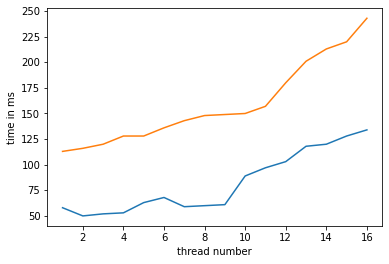

In [5]:
# Uniform distribution memory increments comparison
single_fat = [58, 50, 52, 53, 63, 68, 59, 60, 61, 89, 97, 103, 118, 120, 128, 134]
fat_2 = [113, 116, 120, 128, 128, 136, 143, 148, 149, 150, 157, 180, 201, 213, 220, 243]
#memory_sizes = [100000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000]
memory_sizes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plt.plot(memory_sizes, single_fat, memory_sizes, fat_2)
plt.ylabel('time in ms')
plt.xlabel('thread number')
plt.show()

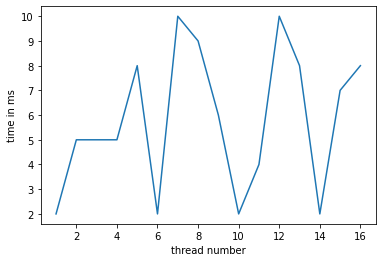

In [7]:
# Pareto distribution memory increments comparison
single_fat = [2, 5, 5, 5, 8, 2, 10, 9, 6, 2, 4, 10, 8, 2, 7, 8]
#memory_sizes = [100000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000]
memory_sizes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plt.ylabel('time in ms')
plt.xlabel('thread number')
plt.plot(memory_sizes, single_fat)
plt.show()

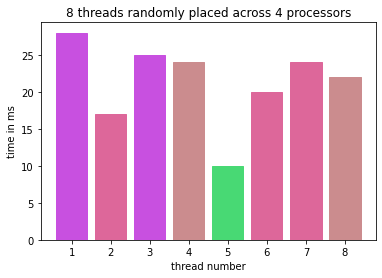

In [10]:
#Pareto distribution 8 threads - 4 fat and 4 thin
times = [28, 17, 25, 24, 10, 20, 24, 22]
threads = [1,2,3,4,5,6,7,8]
cpus = [0,3,0,2,1,3,3,2]
generate_graph(threads, times, '8 threads randomly placed across 4 processors')
plt.show()

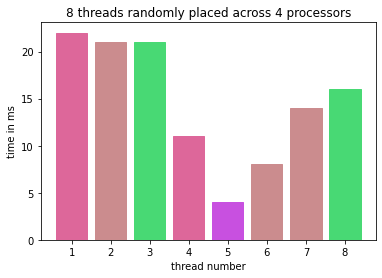

In [11]:
#Pareto distribution 8 threads - 4 fat and 4 thin
times = [22, 21, 21, 11, 4, 8, 14, 16]
threads = [1,2,3,4,5,6,7,8]
cpus = [3,2,1,3,0,2,2,1]
generate_graph(threads, times, '8 threads randomly placed across 4 processors')
plt.show()

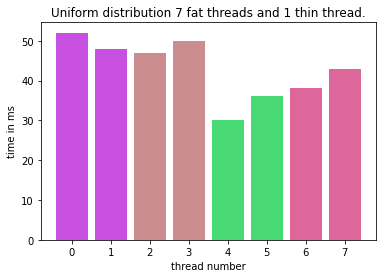

In [12]:
# Uniform distribution with 7 fat threads and 1 thin thread. Fat thread memory consumption is 2mb.
# Thread 4 and 5 are colocated thin and fat thread on processor 1. 
times = [52, 48, 47, 50, 30, 36, 38, 43]
threads = [x for x in range(8)]
cpus = [0,0,2,2,1,1,3,3]
generate_graph(threads, times, 'Uniform distribution 7 fat threads and 1 thin thread.')
plt.show()

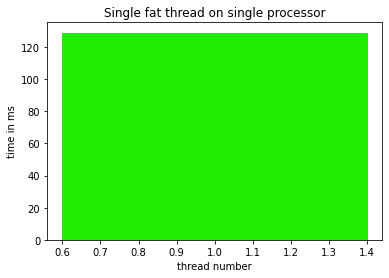

In [12]:
times = [129]
threads = [1]
cpus = [0]
generate_graph(threads, times, 'Single fat thread on single processor')

plt.show()

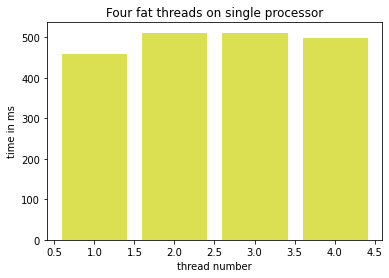

In [54]:
times =[458, 511, 511, 499]
threads = [1,2,3,4]
cpus = [0,0,0,0]
generate_graph(threads, times, 'Four fat threads on single processor')

plt.show()

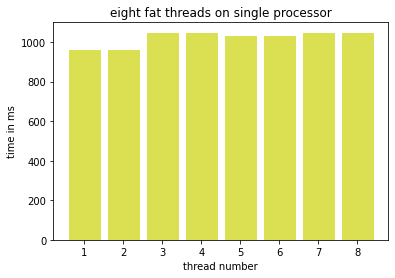

In [55]:
times =[960, 960, 1047, 1046, 1029, 1032, 1046, 1044]
threads = [1,2,3,4, 5, 6, 7, 8]
cpus = [0,0,0,0,0,0,0,0]
generate_graph(threads, times, 'eight fat threads on single processor')
plt.show()

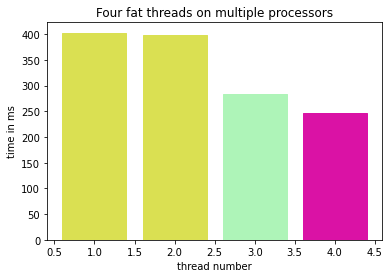

In [56]:
times = [403, 398, 283, 246]
threads = [1,2,3,4]
cpus = [0,0,2,1]
generate_graph(threads, times, 'Four fat threads on multiple processors')
plt.show()

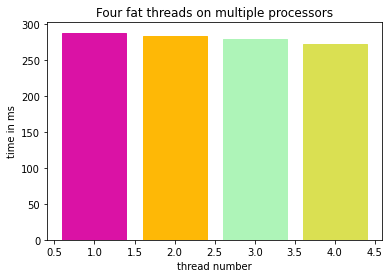

In [57]:
times = [288, 284, 279, 273]
threads = [1,2,3,4]
cpus = [1,3,2,0]
generate_graph(threads, times, 'Four fat threads on multiple processors')

plt.show()

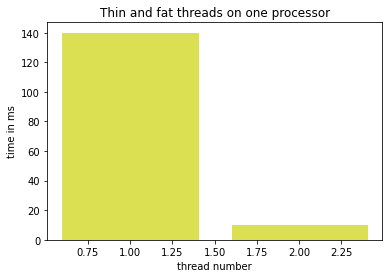

In [58]:
times = [140, 10]
threads = [1,2]
cpus = [0,0]
generate_graph(threads, times, 'Thin and fat threads on one processor')
plt.show()

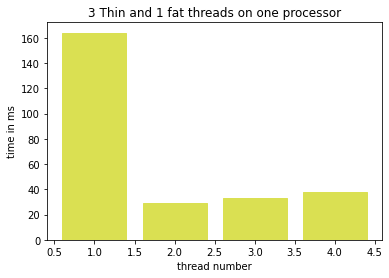

In [59]:
times = [164, 29, 33, 38]
threads = [1,2, 3, 4]
cpus = [0,0, 0, 0]

generate_graph(threads, times, '3 Thin and 1 fat threads on one processor')
plt.show()

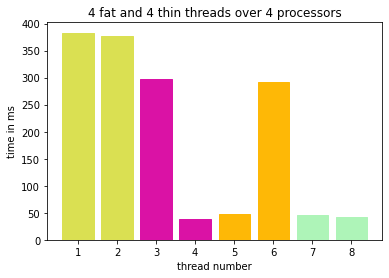

In [60]:
times = [383, 376, 298, 38, 47, 292, 46, 42]
threads = [1,2,3,4,5,6,7,8]
cpus = [0,0,1,1,3,3,2,2]
generate_graph(threads, times, '4 fat and 4 thin threads over 4 processors')
plt.show()

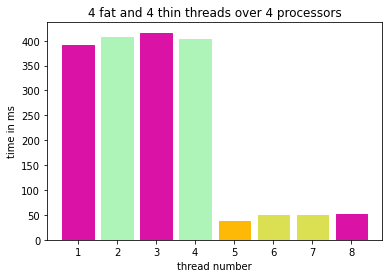

In [61]:
times = [392, 407, 416, 404, 38, 50, 49, 51]
threads = [1,2,3,4,5,6,7,8]
cpus = [1,2,1,2,3,0,0,1]
generate_graph(threads, times, '4 fat and 4 thin threads over 4 processors')
plt.show()